<a href="https://colab.research.google.com/github/bmaged23/EDA/blob/main/EDA_EDA_and_ML_for_diamonds_dataset_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d shivam2503/diamonds

Dataset URL: https://www.kaggle.com/datasets/shivam2503/diamonds
License(s): unknown
diamonds.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
with zipfile.ZipFile("/content/diamonds.zip","r") as file:
  file.extractall("/content/diamonds")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

url="/content/diamonds/diamonds.csv"
df=pd.read_csv(url)
new_df=df
new_df=new_df.drop_duplicates()
new_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
new_df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
new_df["cut"]=new_df["cut"].astype("category")
new_df["color"]=new_df["color"].astype("category")
new_df["clarity"]=new_df["clarity"].astype("category")
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  53940 non-null  int64   
 1   carat       53940 non-null  float64 
 2   cut         53940 non-null  category
 3   color       53940 non-null  category
 4   clarity     53940 non-null  category
 5   depth       53940 non-null  float64 
 6   table       53940 non-null  float64 
 7   price       53940 non-null  int64   
 8   x           53940 non-null  float64 
 9   y           53940 non-null  float64 
 10  z           53940 non-null  float64 
dtypes: category(3), float64(6), int64(2)
memory usage: 3.4 MB


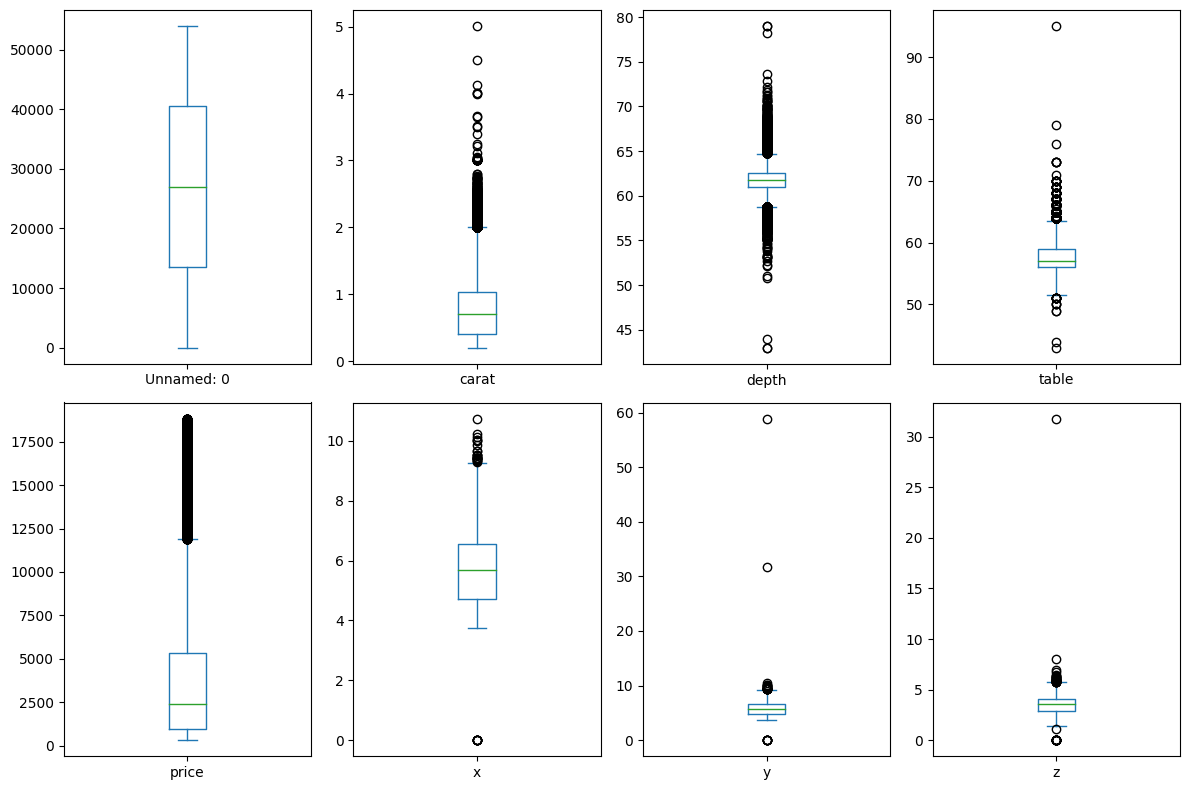

In [ ]:
new_df.plot(kind='box', subplots=True, layout=(2, -1), figsize=(12, 8))
plt.tight_layout()
plt.show()

In [ ]:
#price 3000 carat 1889
new_df[new_df["carat"]>2]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
12246,12247,2.06,Premium,J,I1,61.2,58.0,5203,8.10,8.07,4.95
13002,13003,2.14,Fair,J,I1,69.4,57.0,5405,7.74,7.70,5.36
13118,13119,2.15,Fair,J,I1,65.5,57.0,5430,8.01,7.95,5.23
13757,13758,2.22,Fair,J,I1,66.7,56.0,5607,8.04,8.02,5.36
13991,13992,2.01,Fair,I,I1,67.4,58.0,5696,7.71,7.64,5.17
...,...,...,...,...,...,...,...,...,...,...,...
27741,27742,2.15,Ideal,G,SI2,62.6,54.0,18791,8.29,8.35,5.21
27742,27743,2.04,Premium,H,SI1,58.1,60.0,18795,8.37,8.28,4.84
27744,27745,2.29,Premium,I,SI1,61.8,59.0,18797,8.52,8.45,5.24
27746,27747,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11


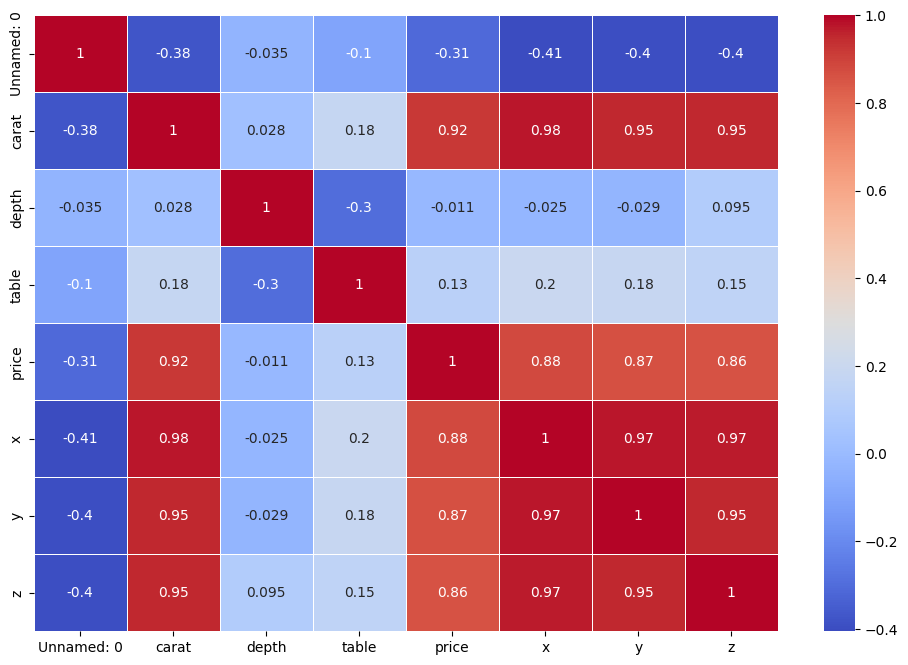

In [ ]:
col = list(new_df.columns)
num_df = new_df[col[:2] + col[5:]]
correlation=num_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)

plt.show()

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price']


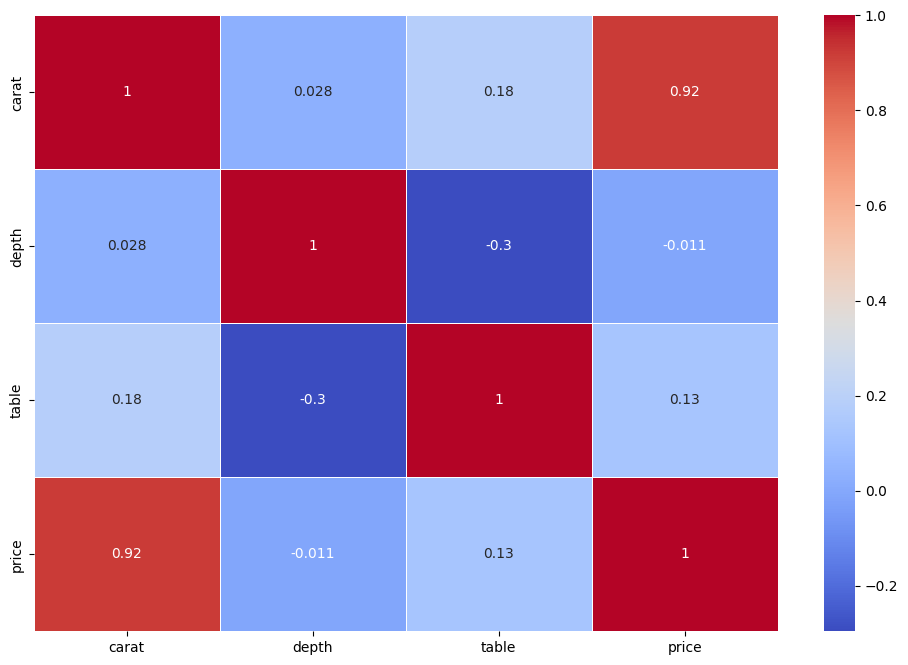

In [ ]:
new_df=new_df.drop(columns=["Unnamed: 0","x","y","z"])
col = list(new_df.columns)
print(col)
num_df = new_df[[col[0]] + col[4:]]
correlation=num_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)

plt.show()

In [ ]:
for cl in col:
  print(cl)
  print(new_df[cl].unique())
new_df=pd.get_dummies(new_df)

carat
[0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9
 0.91 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98
 0.52 1.01 0.53 0.84 0.51 1.05 0.55 0.87 1.   0.57 0.82 1.04 0.93 1.2
 0.99 0.34 0.43 0.36 0.95 0.89 1.02 0.97 0.56 0.85 0.92 1.27 0.66 1.12
 0.68 1.03 0.62 1.22 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.27 0.41
 1.13 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11
 1.1  1.18 1.15 1.25 1.07 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.32 1.41 1.36 1.45 1.34 1.58 1.54 1.38 1.33 1.74 1.64 1.47 1.4  1.55
 1.95 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15
 1.96 2.22 1.7  1.53 1.85 2.01 2.27 1.68 1.56 1.81 1.65 1.82 2.03 1.73
 1.59 1.42 1.43 2.08 1.48 1.6  2.49 1.71 2.02 2.07 3.   2.21 2.1  1.91
 2.25 2.17 2.32 2.72 1.61 2.23 2.11 2.05 1.63 2.3  2.31 1.75 2.04 2.12
 1.77 2.5  1.8  1.67 1.84 2.2  3.01 1.88 2.33 2.68 2.34 1.9  2.16 2.74
 1.

In [ ]:
new_df

,carat,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,False,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,2757,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,2757,False,False,False,False,True,True,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,2757,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
scale=StandardScaler()
col=list(new_df.columns)
new_df=pd.DataFrame(scale.fit_transform(new_df),columns=col)

In [ ]:

new_df

,carat,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198168,-0.174092,-1.099672,-0.904095,-0.175403,-0.316312,1.225928,-0.586085,-0.537255,-0.379005,...,-0.334294,-0.234343,-0.11802,-0.185268,-0.565361,2.206098,-0.422524,-0.542295,-0.269603,-0.321954
1,-1.240361,-1.360738,1.585529,-0.904095,-0.175403,-0.316312,-0.815708,1.706238,-0.537255,-0.379005,...,-0.334294,-0.234343,-0.11802,-0.185268,1.768781,-0.453289,-0.422524,-0.542295,-0.269603,-0.321954
2,-1.198168,-3.385019,3.375663,-0.903844,-0.175403,3.161440,-0.815708,-0.586085,-0.537255,-0.379005,...,-0.334294,-0.234343,-0.11802,-0.185268,-0.565361,-0.453289,2.366727,-0.542295,-0.269603,-0.321954
3,-1.071587,0.454133,0.242928,-0.902090,-0.175403,-0.316312,-0.815708,1.706238,-0.537255,-0.379005,...,2.991381,-0.234343,-0.11802,-0.185268,-0.565361,-0.453289,-0.422524,1.844015,-0.269603,-0.321954
4,-1.029394,1.082358,0.242928,-0.901839,-0.175403,3.161440,-0.815708,-0.586085,-0.537255,-0.379005,...,-0.334294,4.267248,-0.11802,-0.185268,-0.565361,2.206098,-0.422524,-0.542295,-0.269603,-0.321954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,-0.164427,-0.662711,-0.204605,-0.294731,-0.175403,-0.316312,1.225928,-0.586085,-0.537255,2.638489,...,-0.334294,-0.234343,-0.11802,-0.185268,1.768781,-0.453289,-0.422524,-0.542295,-0.269603,-0.321954
53936,-0.164427,0.942753,-1.099672,-0.294731,-0.175403,3.161440,-0.815708,-0.586085,-0.537255,2.638489,...,-0.334294,-0.234343,-0.11802,-0.185268,1.768781,-0.453289,-0.422524,-0.542295,-0.269603,-0.321954
53937,-0.206621,0.733344,1.137995,-0.294731,-0.175403,-0.316312,-0.815708,-0.586085,1.861315,2.638489,...,-0.334294,-0.234343,-0.11802,-0.185268,1.768781,-0.453289,-0.422524,-0.542295,-0.269603,-0.321954
53938,0.130927,-0.523105,0.242928,-0.294731,-0.175403,-0.316312,-0.815708,1.706238,-0.537255,-0.379005,...,-0.334294,-0.234343,-0.11802,-0.185268,-0.565361,2.206098,-0.422524,-0.542295,-0.269603,-0.321954


In [ ]:
from sklearn.model_selection import train_test_split
col=list(new_df.columns)
print(col)
Y=new_df[col[4]]
X=new_df[col[:4]+col[5:]]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=42)
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,test_size=0.5,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

['carat', 'depth', 'table', 'price', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']
(32364, 23)
(10788, 23)
(32364,)
(10788,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

r2 = r2_score(y_test, y_pred)
print("test R² score:", r2)

test R² score: 1.0


In [ ]:
y_pred=model.predict(x_train)
r2 = r2_score(y_train, y_pred)
print("train R² score:", r2)

y_pred=model.predict(x_val)
r2 = r2_score(y_val, y_pred)
print("val R² score:", r2)

train R² score: 1.0
val R² score: 1.0
